<a href="https://colab.research.google.com/github/JaimeVillalbaO/Data-Science-Advanced-Day-99/blob/main/Space_Missions_Analysis_(start).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [ ]:
%pip install iso3166

### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [ ]:
%pip install --upgrade plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 39.4 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.15.0
    Uninstalling plotly-5.15.0:
      Successfully uninstalled plotly-5.15.0


### Import Statements

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator
# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta

### Notebook Presentation

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [ ]:
df_data = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`?
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [ ]:
df_data.shape

(4324, 9)

In [ ]:
df_data.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Organisation', 'Location', 'Date',
       'Detail', 'Rocket_Status', 'Price', 'Mission_Status'],
      dtype='object')

In [ ]:
df_data.isna().any()

Unnamed: 0.1      False
Unnamed: 0        False
Organisation      False
Location          False
Date              False
Detail            False
Rocket_Status     False
Price              True
Mission_Status    False
dtype: bool

In [ ]:
df_data.head()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data.

In [ ]:
df_data.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1, inplace=True)


In [ ]:
print(df_data.duplicated().any())
duplicated_rows = df_data[df_data.duplicated()]
print(duplicated_rows.shape)
df_data = df_data.drop_duplicates()

True
(1, 7)


In [ ]:
df_data.shape


(4323, 7)

## Descriptive Statistics

In [ ]:
df_data.describe()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
count,4323,4323,4323,4323,4323,963,4323
unique,56,137,4319,4278,2,56,4
top,RVSN USSR,"Site 31/6, Baikonur Cosmodrome, Kazakhstan","Sun Aug 25, 1991 08:40 UTC",Cosmos-3MRB (65MRB) | BOR-5 Shuttle,StatusRetired,450.0,Success
freq,1777,235,2,6,3534,136,3878


In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4323 entries, 0 to 4323
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Organisation    4323 non-null   object
 1   Location        4323 non-null   object
 2   Date            4323 non-null   object
 3   Detail          4323 non-null   object
 4   Rocket_Status   4323 non-null   object
 5   Price           963 non-null    object
 6   Mission_Status  4323 non-null   object
dtypes: object(7)
memory usage: 270.2+ KB


# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [ ]:
launches_by_organization = df_data.groupby('Organisation').size().sort_values()

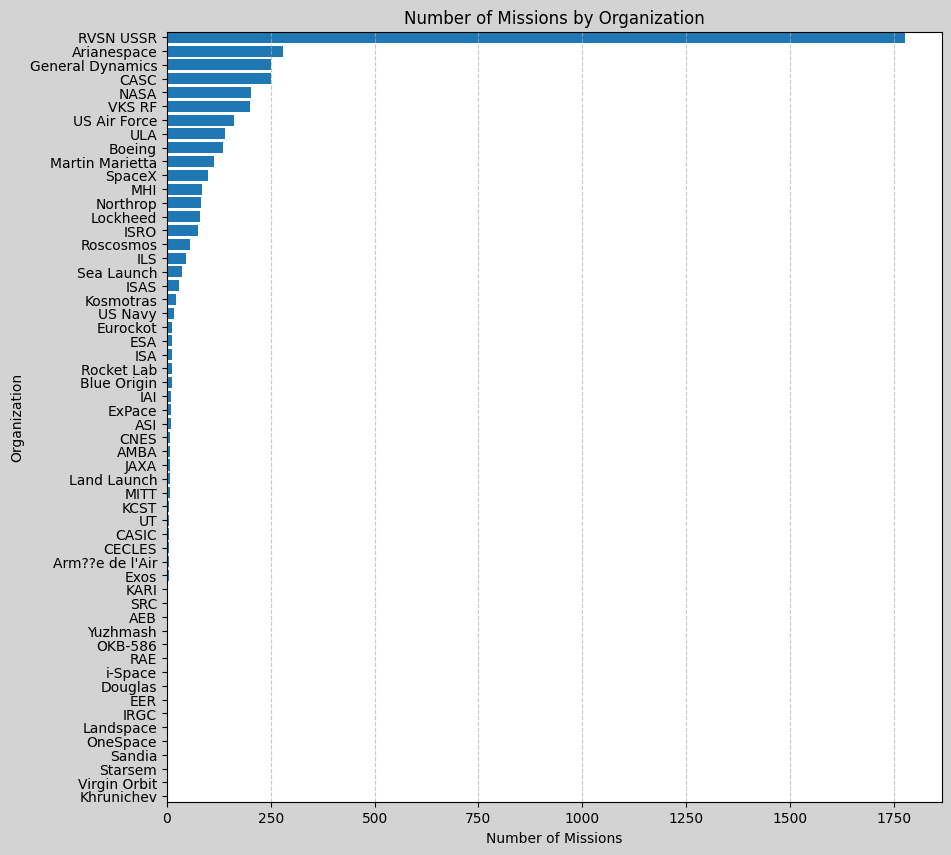

In [ ]:
plt.figure(figsize=(10, 10), facecolor='lightgray')
plt.barh(launches_by_organization.index, launches_by_organization.values)
plt.xlabel('Number of Missions')
plt.ylabel('Organization')
plt.title('Number of Missions by Organization')
plt.margins(y=0)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned?

In [ ]:
df_data['Rocket_Status'].value_counts()

Rocket_Status
StatusRetired    3534
StatusActive      789
Name: count, dtype: int64

# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [ ]:
df_data['Mission_Status'].value_counts()

Mission_Status
Success              3878
Failure               339
Partial Failure       102
Prelaunch Failure       4
Name: count, dtype: int64

# How Expensive are the Launches?

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values).

In [ ]:
df_data_clean = df_data.dropna()
df_price = df_data_clean['Price']

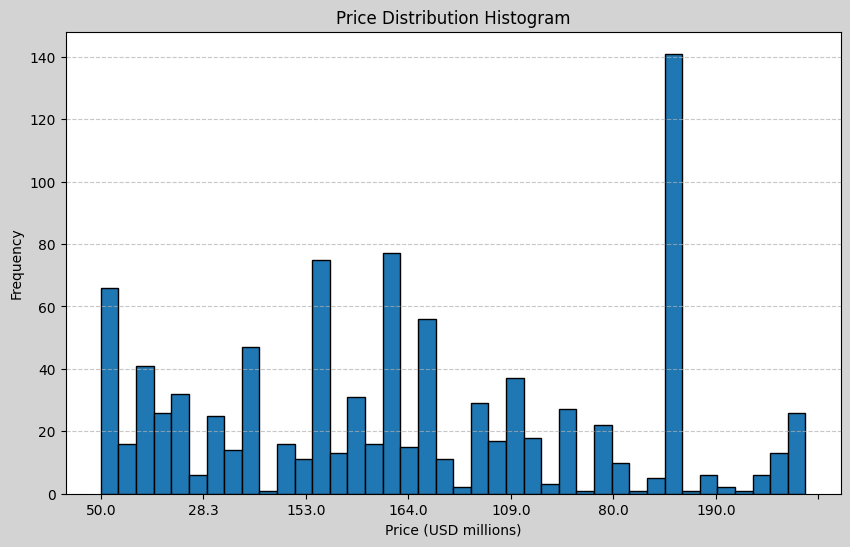

In [ ]:
plt.figure(figsize=(10, 6), facecolor='lightgray')
plt.hist(df_price.values, bins=40, edgecolor='black')
plt.xlabel('Price (USD millions)')
plt.ylabel('Frequency')
plt.title('Price Distribution Histogram')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().xaxis.set_major_locator(MaxNLocator(prune='both'))
plt.show()

# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map.
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [ ]:
### Step 1. ###
renamed_df = df_data
renamed_df.Location = renamed_df.Location.str.replace("USA","UNITED STATES OF AMERICA")
renamed_df.Location = renamed_df.Location.str.replace("Gran Canaria","UNITED STATES OF AMERICA")
renamed_df.Location = renamed_df.Location.str.replace("Russia","RUSSIAN FEDERATION")
renamed_df.Location = renamed_df.Location.str.replace("Barents Sea","RUSSIAN FEDERATION")
renamed_df.Location = renamed_df.Location.str.replace("New Mexico","UNITED STATES OF AMERICA")
renamed_df.Location = renamed_df.Location.str.replace("Yellow Sea","CHINA")
renamed_df.Location = renamed_df.Location.str.replace("Shahrud Missile Test Site","Iran")
renamed_df.Location = renamed_df.Location.str.replace("Pacific Ocean","UNITED STATES OF AMERICA")
renamed_df.Location = renamed_df.Location.str.replace("Pacific Missile Range Facility","UNITED STATES OF AMERICA")

### Step 2 ###
df_country = renamed_df["Location"].str.split(",", expand=True).reset_index()
df_country[3] = df_country[3].str.lstrip(" ")

### Step 3 ###
col_1 = df_country[1]
col_2 = df_country[2]
col_3 = df_country[3]
new_df = []
for one, two, three in zip(col_1, col_2, col_3):
    if three is None:
        three = two
    if three is None:
        three = one
    new_df.append(three)

### Step 4 & 5. I use this step to find out any KeyError countries, added it on to Step 1 and re-run the Kernel until all Countries have been captured ###
import iso3166
country_iso = []
for country in new_df:
    country = country.lstrip(" ")
    if country == "Iran":
        country = "IRAN, ISLAMIC REPUBLIC OF"
    if country == "North Korea":
        country = "KOREA, DEMOCRATIC PEOPLE'S REPUBLIC OF"
    if country == "South Korea":
        country = "KOREA, REPUBLIC OF"
    try:
        country_iso.append(iso3166.countries_by_name[country.upper()][2])
    except KeyError:
        print (country)

### Step 6 & 7###
df_data["Country_ISO"] = pd.DataFrame(country_iso)

choro_df_launches = df_data.groupby(["Country_ISO"], as_index=False).agg({"Detail":pd.Series.count})
choro_df_launches.rename(columns={"Detail":"Launch_Counts"}, inplace=True)
choro_df_launches.sort_values("Launch_Counts", ascending=False)

fig = px.choropleth(choro_df_launches, locations="Country_ISO", color="Launch_Counts", color_continuous_scale="sunsetdark")
fig.show()

# Use a Choropleth Map to Show the Number of Failures by Country


In [ ]:
failures_by_country = df_data[df_data['Mission_Status'] == 'Failure']
failures_by_country = failures_by_country.groupby(['Country_ISO']).size().reset_index(name='Failure Count')
fig = px.choropleth(
    failures_by_country,
    locations="Country_ISO",
    color="Failure Count",
    hover_name="Country_ISO",
    color_continuous_scale='plasma',
)
fig.show()

In [ ]:
df_data.describe()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country_ISO
count,4323,4323,4323,4323,4323,963,4323,4322
unique,56,137,4319,4278,2,56,4,15
top,RVSN USSR,"Site 31/6, Baikonur Cosmodrome, Kazakhstan","Sun Aug 25, 1991 08:40 UTC",Cosmos-3MRB (65MRB) | BOR-5 Shuttle,StatusRetired,450.0,Success,RUS
freq,1777,235,2,6,3534,136,3878,1398


# Create a Plotly Sunburst Chart of the countries, organisations, and mission status.

In [ ]:
df_data['Country_ISO'].fillna(value='Unknown', inplace=True)

fig = px.sunburst(df_data,
                  path=['Country_ISO', 'Organisation', 'Mission_Status'],
                  hover_data=['Country_ISO'],
                  color_continuous_scale='viridis',
)
fig.show()

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [ ]:
df_data['Price'] = df_data['Price'].str.replace(',', '')
df_data['Price'] = df_data['Price'].astype(float)

In [ ]:
money_spent_by_organization = df_data.dropna().groupby('Organisation')['Price'].sum().sort_values(ascending=False)

In [ ]:
money_spent_by_organization

Organisation
NASA              76,280.00
Arianespace       16,345.00
ULA               14,798.00
RVSN USSR         10,000.00
CASC               6,310.51
SpaceX             5,444.00
Northrop           3,930.00
MHI                3,532.50
ISRO               2,177.00
US Air Force       1,550.92
VKS RF             1,548.90
ILS                1,320.00
Boeing             1,241.00
Roscosmos          1,187.50
Martin Marietta      721.40
Kosmotras            638.00
Eurockot             543.40
Lockheed             280.00
JAXA                 168.00
Rocket Lab            97.50
ESA                   37.00
ExPace                28.30
EER                   20.00
Sandia                15.00
Virgin Orbit          12.00
Name: Price, dtype: float64

# Analyse the Amount of Money Spent by Organisation per Launch

In [ ]:
money_spent_by_organization_per_launch = pd.concat([money_spent_by_organization, launches_by_organization], axis=1).reset_index()
money_spent_by_organization_per_launch.columns = ['Organization', 'Money Spent', 'Launch Count']
money_spent_by_organization_per_launch['Money per Launch'] = money_spent_by_organization_per_launch['Money Spent'] / money_spent_by_organization_per_launch['Launch Count']
money_spent_by_organization_per_launch = money_spent_by_organization_per_launch.sort_values('Money per Launch', ascending=False).dropna()

In [ ]:
money_spent_by_organization_per_launch

,Organization,Money Spent,Launch Count,Money per Launch
0,NASA,"76,280.00",203,375.76
2,ULA,"14,798.00",140,105.70
1,Arianespace,"16,345.00",279,58.58
5,SpaceX,"5,444.00",100,54.44
6,Northrop,"3,930.00",83,47.35
7,MHI,"3,532.50",84,42.05
16,Eurockot,543.40,13,41.80
15,Kosmotras,638.00,22,29.00
11,ILS,"1,320.00",46,28.70
8,ISRO,"2,177.00",76,28.64


# Chart the Number of Launches per Year

In [ ]:
df_data['Date'] = df_data['Date'].apply(lambda x: " ".join(x.split(" ")[:4]))
df_data['Date'] = pd.to_datetime(df_data['Date'], format='%a %b %d, %Y')
launches_per_year = df_data.groupby(df_data['Date'].dt.year).size()

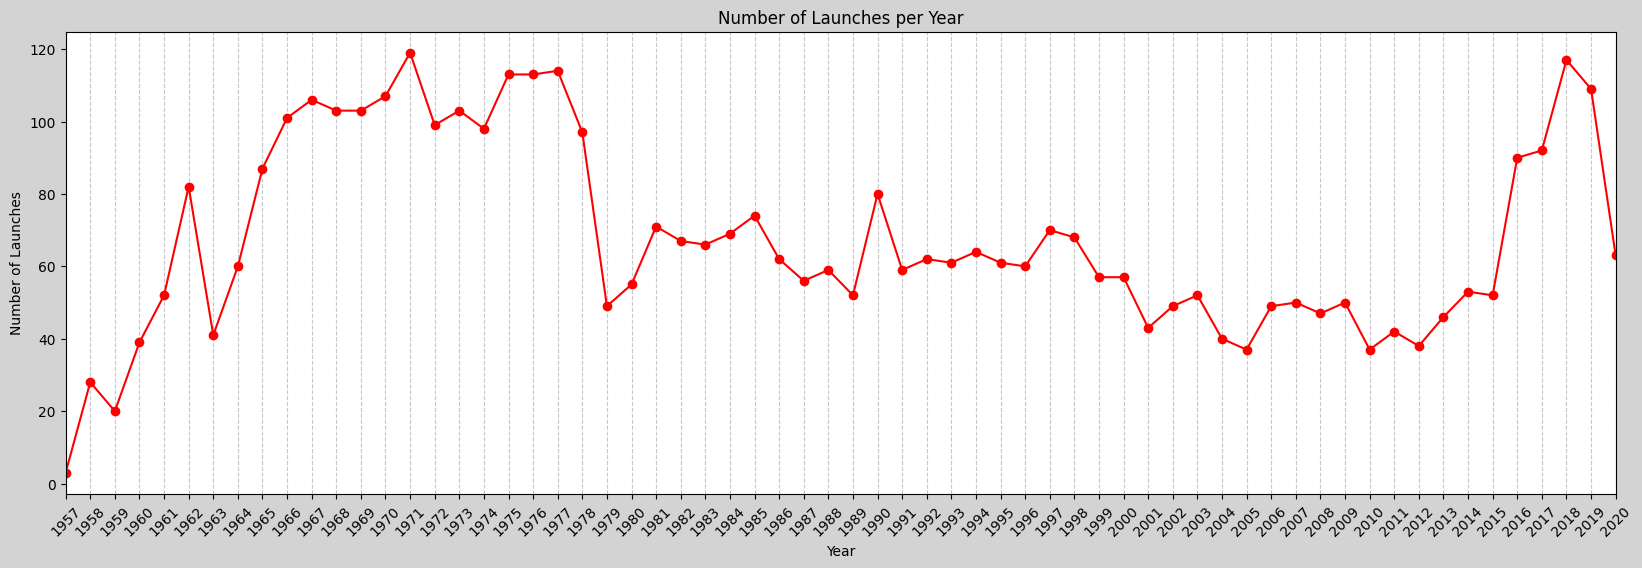

In [ ]:
plt.figure(figsize=(20, 6), facecolor='lightgray')
plt.plot(launches_per_year, marker='o', linestyle='-', color='red')
plt.xlabel('Year')
plt.ylabel('Number of Launches')
plt.title('Number of Launches per Year')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.xticks(launches_per_year.index, rotation=45)
plt.margins(x=0)

plt.show()

In [ ]:
df_data.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country_ISO
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, UNITED ...",2020-08-07,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,CHN
2,SpaceX,"Pad A, Boca Chica, Texas, UNITED STATES OF AME...",2020-08-04,Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,KAZ
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, UNITED ST...",2020-07-30,Atlas V 541 | Perseverance,StatusActive,145.00,Success,USA


# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart.

In [ ]:
launches_month_on_month = df_data.groupby('Date').size().reset_index(name='Launch Count')
launches_month_on_month = launches_month_on_month.groupby([launches_month_on_month['Date'].dt.month.rename('Month'), launches_month_on_month['Date'].dt.day.rename('Day')])['Launch Count'].sum().reset_index(name='Launch Count')
launches_month_on_month['Rolling Average'] = launches_month_on_month['Launch Count'].rolling(30).mean()
launches_month_on_month['Year'] = '2020'
launches_month_on_month['Date'] = pd.to_datetime(launches_month_on_month[['Year', 'Month', 'Day']])

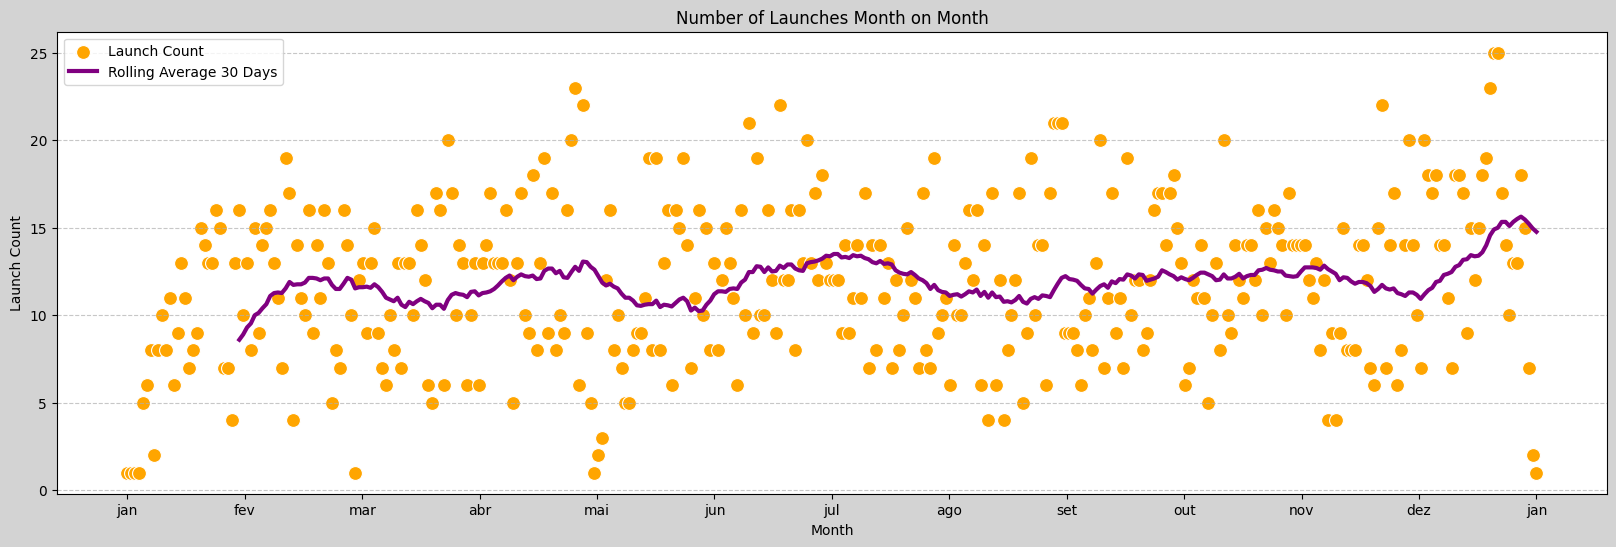

In [ ]:
min_date = launches_month_on_month['Date'].min()
max_date = launches_month_on_month['Date'].max()
total_days = (max_date - min_date).days
monthly_intervals = [min_date + timedelta(days=total_days/12 * i) for i in range(13)]
month_labels = ['jan', 'fev', 'mar', 'abr', 'mai', 'jun', 'jul', 'ago', 'set', 'out', 'nov', 'dez', 'jan']

plt.figure(figsize=(20, 6), facecolor='lightgray')

ax = sns.scatterplot(
      x = 'Date',
			y = 'Launch Count',
			data = launches_month_on_month,
      label = 'Launch Count',
      color = 'orange',
      marker = 'o',
      s = 100
)
sns.lineplot(
      x = 'Date',
			y = 'Rolling Average',
			data = launches_month_on_month,
      label = 'Rolling Average 30 Days',
      color = 'purple',
      linewidth = 3,
)
plt.xlabel('Month')
plt.ylabel('Launch Count')
plt.title('Number of Launches Month on Month')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(ticks=monthly_intervals, labels=month_labels)
plt.legend(loc='upper left')

plt.show()

In [ ]:
launches_month_on_month.head(15)

,Month,Day,Launch Count,Rolling Average,Year,Date
0,1,1,1,NaN,2020,2020-01-01
1,1,2,1,NaN,2020,2020-01-02
2,1,3,1,NaN,2020,2020-01-03
3,1,4,1,NaN,2020,2020-01-04
4,1,5,5,NaN,2020,2020-01-05
5,1,6,6,NaN,2020,2020-01-06
6,1,7,8,NaN,2020,2020-01-07
7,1,8,2,NaN,2020,2020-01-08
8,1,9,8,NaN,2020,2020-01-09
9,1,10,10,NaN,2020,2020-01-10


# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

In [ ]:
launches_month_on_month.groupby('Month')['Launch Count'].sum()


Month
1     268
2     336
3     353
4     383
5     326
6     402
7     351
8     373
9     365
10    381
11    335
12    450
Name: Launch Count, dtype: int64

# How has the Launch Price varied Over Time?

Create a line chart that shows the average price of rocket launches over time.

In [ ]:
df_data_clean = df_data_clean.drop(df_data_clean[df_data_clean['Price'] == '63.2363.23'].index)
df_data_clean['Price'] = df_data_clean['Price'].str.replace(',', '').astype(float)
df_data_clean['Date'] = pd.to_datetime(df_data_clean['Date'], format='%a %b %d, %Y')
average_launch_price = df_data_clean.groupby(df_data_clean['Date'].dt.year)['Price'].mean()

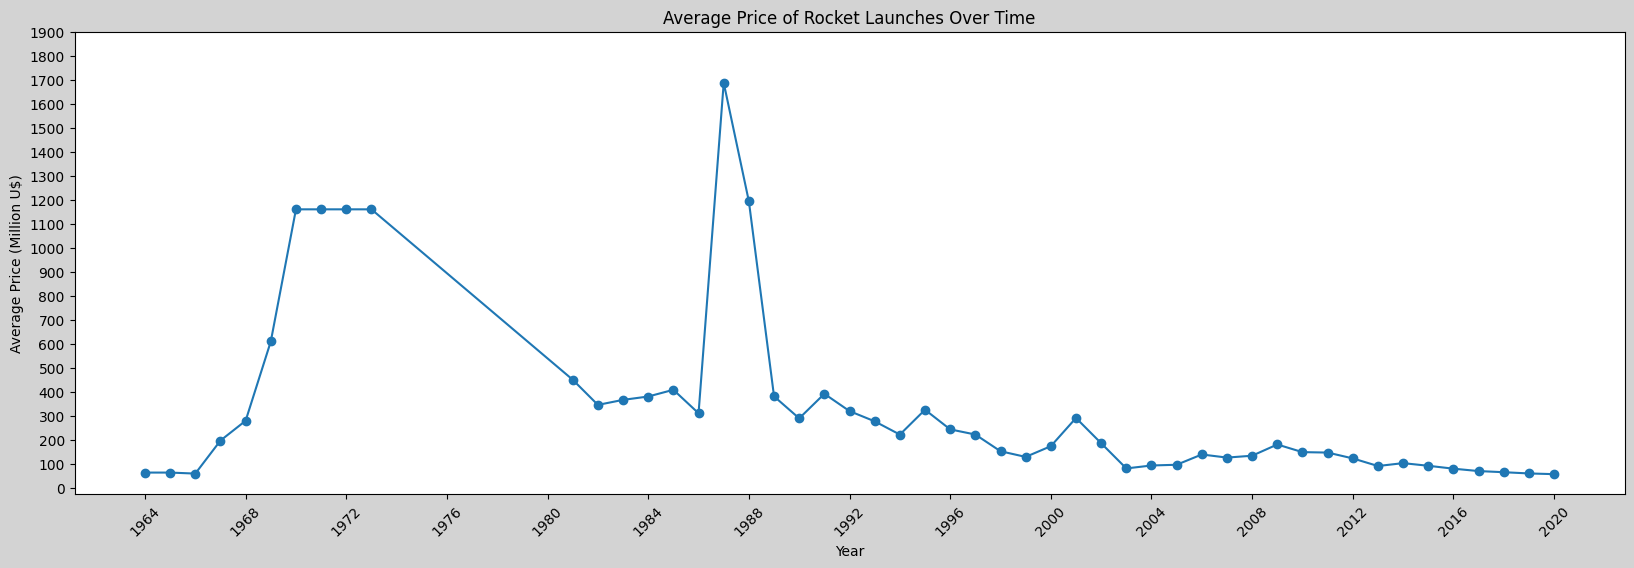

In [ ]:
plt.figure(figsize=(20, 6), facecolor='lightgray')
plt.plot(average_launch_price.index, average_launch_price.values, marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Average Price (Million U$)')
plt.title('Average Price of Rocket Launches Over Time')
plt.xticks(range(1964, 2021, 4), rotation=45)
plt.yticks(range(0, 2000, 100))
plt.show()

# Chart the Number of Launches over Time by the Top 10 Organisations.

How has the dominance of launches changed over time between the different players?

In [ ]:
launches_top10_organizations = df_data.groupby([df_data['Date'].dt.year.rename('Year'), 'Organisation']).size().reset_index(name='Launch Count')
top10_organizations = launches_top10_organizations.groupby('Organisation')['Launch Count'].sum().sort_values(ascending=False).head(10).reset_index()
launches_top10_organizations = launches_top10_organizations.merge(top10_organizations['Organisation'], on='Organisation', how='inner')

In [ ]:
fig = px.bar(launches_top10_organizations, x="Year", y="Launch Count", color="Organisation")
fig.update_layout(title="Number of Launches over Time by Top 10 Organizations")
fig.show()

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991.

In [ ]:

cold_war_update = {
    'RUS': 'USSR',
    'KAZ': 'USSR'
}
df_data.loc[(df_data['Date'].dt.year <= 1991), 'Country_ISO'] = df_data['Country_ISO'].replace(cold_war_update)

In [ ]:
cold_war = df_data[df_data['Date'].dt.year <= 1991]
cold_war_launches = cold_war.groupby([cold_war['Date'].dt.year.rename('Year'), 'Country_ISO']).size().reset_index(name='Launch Count')

## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches.

In [ ]:
cold_war_launches_USA_USSR = cold_war_launches.loc[cold_war_launches['Country_ISO'].isin(['USA', 'USSR'])]

In [ ]:
fig = px.pie(cold_war_launches_USA_USSR, values="Launch Count", names="Country_ISO", title='Cold War Space Race Total Rocket Launches')
fig.show()

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

In [ ]:
fig = px.bar(cold_war_launches_USA_USSR, x="Year", y="Launch Count", color='Country_ISO', barmode='group', title='Total Number of Launches Year-On-Year')
fig.update_xaxes(dtick=1)
fig.show()

## Chart the Total Number of Mission Failures Year on Year.

In [ ]:
mission_status_year_on_year = df_data.groupby(df_data['Date'].dt.year.rename('Year'))['Mission_Status'].value_counts().reset_index(name='Total')
mission_failures_year_on_year = mission_status_year_on_year[mission_status_year_on_year['Mission_Status'] == 'Failure']

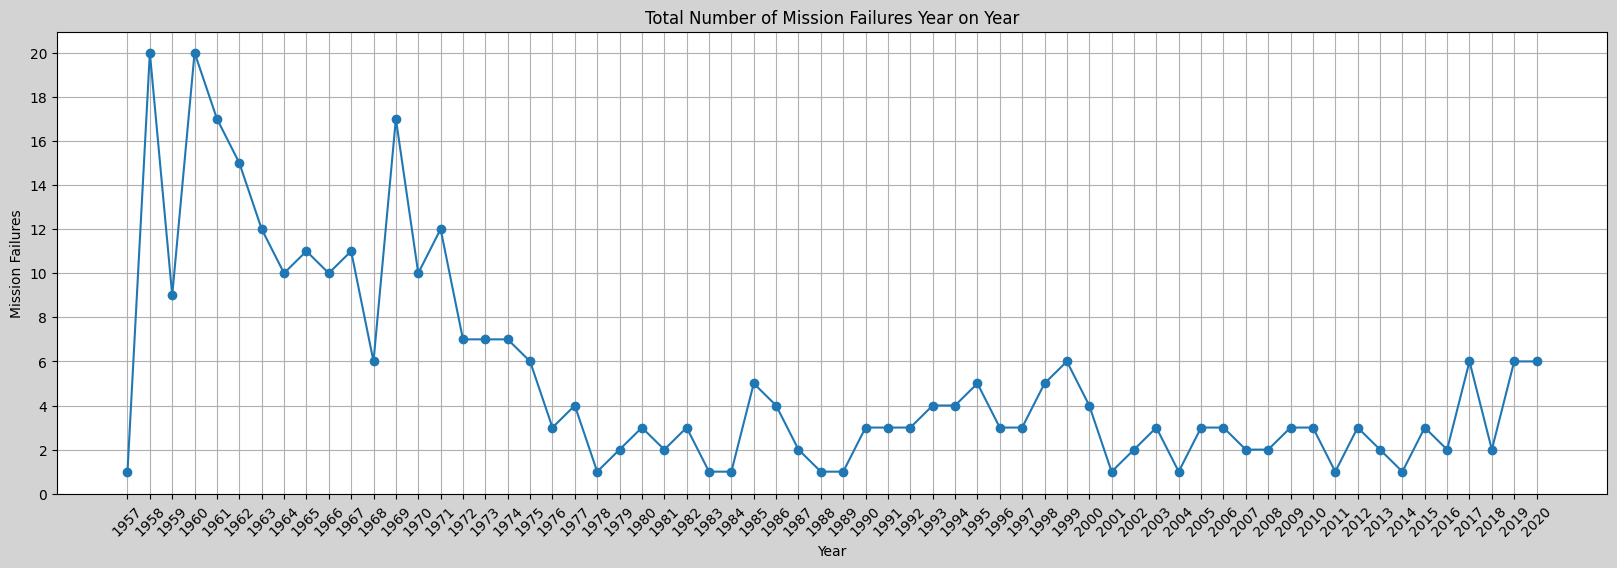

In [ ]:
plt.figure(figsize=(20, 6), facecolor='lightgray')
plt.plot(mission_failures_year_on_year['Year'], mission_failures_year_on_year['Total'], marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Mission Failures')
plt.title('Total Number of Mission Failures Year on Year')
plt.xticks(mission_failures_year_on_year['Year'], rotation=45)
plt.yticks(range(0, 21, 2))
plt.grid(True)
plt.show()

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time?

In [ ]:
total_mission_status_year_on_year = mission_status_year_on_year.groupby(['Year'])['Total'].sum().reset_index(name='Total Missions')
mission_failures_year_on_year_percentage = mission_failures_year_on_year.merge(total_mission_status_year_on_year, on='Year')
mission_failures_year_on_year_percentage['Percentage'] = (mission_failures_year_on_year_percentage['Total'] / mission_failures_year_on_year_percentage['Total Missions']) * 100

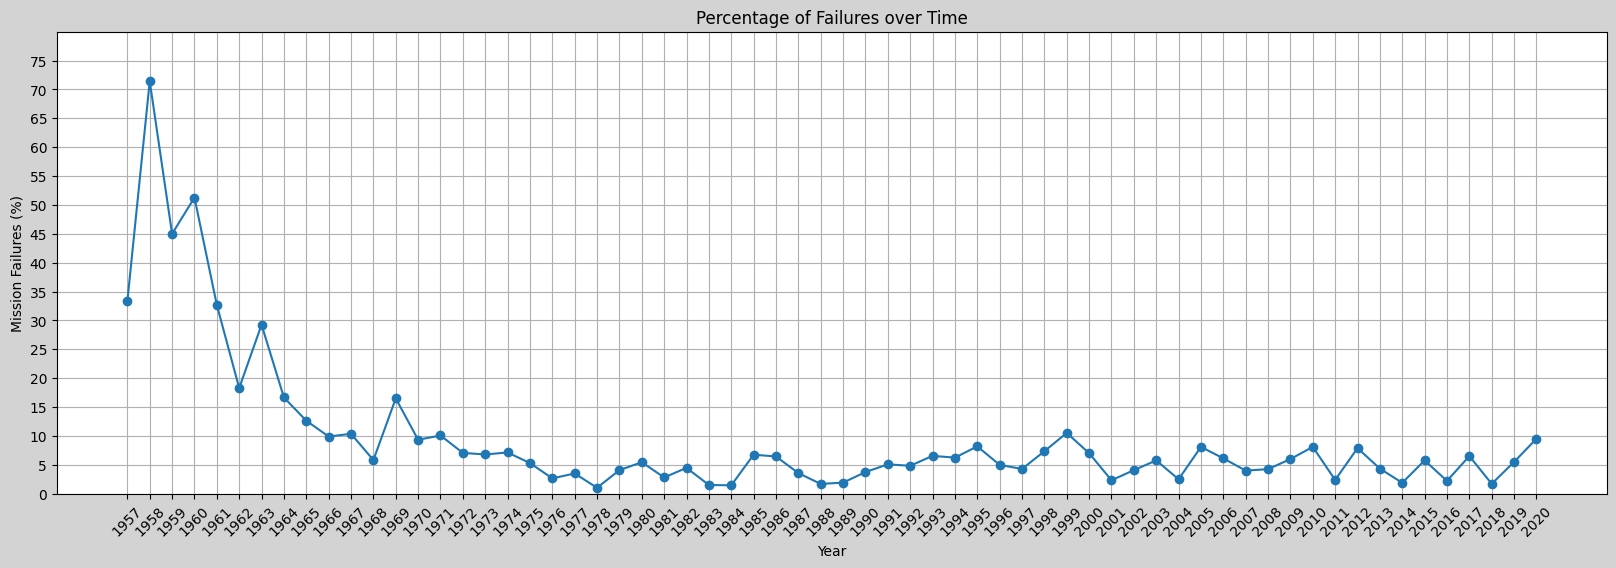

In [ ]:
plt.figure(figsize=(20, 6), facecolor='lightgray')
plt.plot(mission_failures_year_on_year_percentage['Year'], mission_failures_year_on_year_percentage['Percentage'], marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Mission Failures (%)')
plt.title('Percentage of Failures over Time')
plt.xticks(mission_failures_year_on_year_percentage['Year'], rotation=45)
plt.ylim(0, 80)
plt.yticks(range(0, 80, 5))
plt.grid(True)
plt.show()

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches?

In [ ]:
top_country_per_year = df_data.groupby([df_data['Date'].dt.year.rename('Year'), 'Country_ISO']).size().reset_index(name='Launch Count')
# top_country_launches_per_year = top_country_per_year.groupby(['Year', 'Country_ISO'])['Launch Count'].sum().reset_index(name='Launch Count')
top_country_launches_per_year = top_country_per_year.loc[top_country_per_year.groupby('Year')['Launch Count'].idxmax()]



In [ ]:
fig = px.bar(top_country_launches_per_year, x="Year", y="Launch Count", color='Country_ISO', title='Lead Country in Total Launches')
fig.update_xaxes(dtick=1)
fig.show()

# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020?

In [ ]:
organization_lead_launch = df_data.groupby([df_data['Date'].dt.year.rename('Year'), 'Organisation']).size().reset_index(name='Launch Count')
organization_lead_launch = organization_lead_launch.loc[organization_lead_launch.groupby('Year')['Launch Count'].idxmax()]


In [ ]:
fig = px.bar(organization_lead_launch, x="Year", y="Launch Count", color='Organisation', title='Lead Organization in Total Launches')
fig.update_xaxes(dtick=1)
fig.show()